In [0]:
!pip install lxml
import requests
import re
from bs4 import BeautifulSoup
import os
import uuid

スクレイピング用ライブラリのインポート

In [0]:
# 検索ワード
word = 'ペン'
# 保存ディレクトリ
images_dir = 'image_data/pen/'

In [0]:
# スクレイピングの実行
# 参考サイト：https://qiita.com/neet-AI/items/98d4194872ee4f53e3b4

# ファイルの有無を調べる
if not os.path.exists(images_dir):
    os.makedirs(images_dir)    # なきゃつくる
# ニフティ画像検索で検索した結果をスクレイピング
url = 'https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20'
# 検索ページ
pages = [1,20,40,60,80,100]
# 画像保存ナンバー
numb = 0

for p in pages:
    # urlの取得
    r = requests.get(url%(word,p))
    # HTMLデータをスクレイピングできる形に
    soup = BeautifulSoup(r.text,'lxml')
    # 先頭が「https://msp.c.yimg.jp/yjimage」で始まるsrc検索
    imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
    for img in imgs:
        # 取得した画像urlの確認
        print('fetched ' + str(img['src']))
        # HTMLの取得
        r = requests.get(img['src'])
        # uuidファイル名が被らないようにファイルを.jpgで作成
        with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
            # 作ったファイルに、画像のデータを書き込む
            file.write(r.content)
        numb += 1



fetched https://msp.c.yimg.jp/yjimage?q=_Ix8BhkXyLGBmiRFgskNYk3uHLTIy84iWASy.82DijhgCWwVqRUffziP1uZj_exPhDH.ZIMXRlgQ7R6bCDl3MoeLnU_UgV2XytlJiVXdLhxEE5F2KjlP1kCH_9baaLueEl3.ZlcN5KsyDmO8D3hpzHDFT.w-&sig=13ftua7do&x=150&y=100
fetched https://msp.c.yimg.jp/yjimage?q=cXHaXJoXyLHs0rWlJ.EUQRvFWTUc5FWOM4iX5cv.tJ6hCXgFCJcy6ZT8_7y.9OsTHdtPNouMeuEGDlFMF5jEetiNuOhj7AcTNqtsrLbrDPALehFPsEFyrnELe.jm92vFbcugeohVZp_rh1dseso6FF24RW0hG9M-&sig=13ivns0c2&x=149&y=149
fetched https://msp.c.yimg.jp/yjimage?q=BhInAvkXyLGPu3axbXkoUhBVcLYgP1YyujFA0fv5h40p0Vcu4zpO0ZvFmOmJNNmnGEi6muDrZ6An2jy.anSgSRlg.ejkaNAO2BxWAigPhtPuUIupzhzcsFz7OBGeYvQHcBZiNZ9vK7RIgKL9rsb4wMd01rA-&sig=13f4eg45g&x=150&y=126
fetched https://msp.c.yimg.jp/yjimage?q=ROcCCpIXyLFmMCtGxOLJUT.hgWn8gySt_ImBYh9r1pLXookspqN8nYBLYPXgpBYzghJ.A9L3cDBBVsUljyOk7Xbe9giGoJw51x22Z6re6Yb7RFqAqyCtyNAS9hORPJ5ZJnolBjZPfKkuJHbrTdWrvw09O_8kF80-&sig=13i8u7vni&x=149&y=149
fetched https://msp.c.yimg.jp/yjimage?q=gOAR_2EXyLHIuIBbrxNpT3zkIYOG1hgrondaioJjcNw8f79ncAgzM6.c3rat

画像が保存されたか確認
画像のファイル名が表示されればOK

In [0]:
!ls image_data/pen

0.jpg	 112.jpg  17.jpg  2.jpg   42.jpg  55.jpg  68.jpg  80.jpg  93.jpg
100.jpg  113.jpg  18.jpg  30.jpg  43.jpg  56.jpg  69.jpg  81.jpg  94.jpg
101.jpg  114.jpg  19.jpg  31.jpg  44.jpg  57.jpg  6.jpg   82.jpg  95.jpg
102.jpg  115.jpg  1.jpg   32.jpg  45.jpg  58.jpg  70.jpg  83.jpg  96.jpg
103.jpg  116.jpg  20.jpg  33.jpg  46.jpg  59.jpg  71.jpg  84.jpg  97.jpg
104.jpg  117.jpg  21.jpg  34.jpg  47.jpg  5.jpg   72.jpg  85.jpg  98.jpg
105.jpg  118.jpg  22.jpg  35.jpg  48.jpg  60.jpg  73.jpg  86.jpg  99.jpg
106.jpg  119.jpg  23.jpg  36.jpg  49.jpg  61.jpg  74.jpg  87.jpg  9.jpg
107.jpg  11.jpg   24.jpg  37.jpg  4.jpg   62.jpg  75.jpg  88.jpg
108.jpg  12.jpg   25.jpg  38.jpg  50.jpg  63.jpg  76.jpg  89.jpg
109.jpg  13.jpg   26.jpg  39.jpg  51.jpg  64.jpg  77.jpg  8.jpg
10.jpg	 14.jpg   27.jpg  3.jpg   52.jpg  65.jpg  78.jpg  90.jpg
110.jpg  15.jpg   28.jpg  40.jpg  53.jpg  66.jpg  79.jpg  91.jpg
111.jpg  16.jpg   29.jpg  41.jpg  54.jpg  67.jpg  7.jpg   92.jpg


In [0]:
# 画像の確認
from IPython.display import Image, display_jpeg

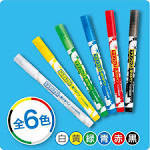

In [0]:
display_jpeg(Image('image_data/pen/100.jpg'))

もう一種類判別用画像データを取得

In [0]:
word = '腕時計'
images_dir = 'image_data/watch/'

In [0]:
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

url = "https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20"
pages = [1,20,40,60,80,100]

numb = 0

for p in pages:
    r = requests.get(url%(word,p))
    soup = BeautifulSoup(r.text,'lxml')
    imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
    for img in imgs:
        print('fetched ' + str(img['src']))
        r = requests.get(img['src'])
        with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
            file.write(r.content)
        numb += 1

fetched https://msp.c.yimg.jp/yjimage?q=Jsh3DvsXyLFumhsiBt.34sI0_snbqpMU56Calx5xcg_OftHsTQgRnQ1Ipn3cAKrRy9O9UD_LAnghW0wemSJ0RH1t49g53NUk4MQTRm.BGrW2DDD.n6nCioNs2NFYKOcAJdya82I.nGzZEQGsrILW2PENvbR0&sig=13g1bbsa0&x=113&y=150
fetched https://msp.c.yimg.jp/yjimage?q=4m9D8fEXyLGsd17Utdn.x7MW4Tv5Kj7en6V6yRRXa3TPTyh8yjyGBhk7kR7LK9P2yngNcPvdgVU093_B9my1pUvOoNGg6g96rDF8AN4qESfPLkRjmFGnd2JRkAEFbz5Ic8EOcsG0ZpavFBreerNk13f57osY&sig=13g5nds9d&x=146&y=146
fetched https://msp.c.yimg.jp/yjimage?q=FwEdn1AXyLHiKSUHN6QI_qtqEpdsVJTYt_yaq53nr6rIz66WXEyNrMf.5LTkyIo9eXGURsb4vd3X4_hIt6RsZKe2G_z3RM_3yjFEXml3eD_pcjfMJrpVImg8W0OppJVfl9Cfg_50WVormCYBvutKc4e6t9I3Yrs-&sig=13ikjd25c&x=150&y=150
fetched https://msp.c.yimg.jp/yjimage?q=yXaVtYgXyLGe4lWW9PRbNorOoWosjMnafVr0KhWVE7EvW4VzurcL0KbPR5r9TRHkxg6O7HmKOMBKkXKFTQhEFiaGzkDTLNkbe70RzbhtvfSWa_MNYKf5etXOui5u9Gf8uLgmtLiRlFN1qD2qg8aWXbRCWs6O&sig=13g986hm6&x=149&y=149
fetched https://msp.c.yimg.jp/yjimage?q=HW0kuCQXyLG_4EdbIcQxvzrnlibkIBBDTUn9ODEfmlqBBoruYenUN8LTZbqzx0hf

In [0]:
!ls image_data/watch

0.jpg	 112.jpg  17.jpg  2.jpg   42.jpg  55.jpg  68.jpg  80.jpg  93.jpg
100.jpg  113.jpg  18.jpg  30.jpg  43.jpg  56.jpg  69.jpg  81.jpg  94.jpg
101.jpg  114.jpg  19.jpg  31.jpg  44.jpg  57.jpg  6.jpg   82.jpg  95.jpg
102.jpg  115.jpg  1.jpg   32.jpg  45.jpg  58.jpg  70.jpg  83.jpg  96.jpg
103.jpg  116.jpg  20.jpg  33.jpg  46.jpg  59.jpg  71.jpg  84.jpg  97.jpg
104.jpg  117.jpg  21.jpg  34.jpg  47.jpg  5.jpg   72.jpg  85.jpg  98.jpg
105.jpg  118.jpg  22.jpg  35.jpg  48.jpg  60.jpg  73.jpg  86.jpg  99.jpg
106.jpg  119.jpg  23.jpg  36.jpg  49.jpg  61.jpg  74.jpg  87.jpg  9.jpg
107.jpg  11.jpg   24.jpg  37.jpg  4.jpg   62.jpg  75.jpg  88.jpg
108.jpg  12.jpg   25.jpg  38.jpg  50.jpg  63.jpg  76.jpg  89.jpg
109.jpg  13.jpg   26.jpg  39.jpg  51.jpg  64.jpg  77.jpg  8.jpg
10.jpg	 14.jpg   27.jpg  3.jpg   52.jpg  65.jpg  78.jpg  90.jpg
110.jpg  15.jpg   28.jpg  40.jpg  53.jpg  66.jpg  79.jpg  91.jpg
111.jpg  16.jpg   29.jpg  41.jpg  54.jpg  67.jpg  7.jpg   92.jpg


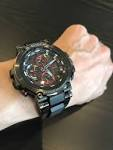

In [0]:
display_jpeg(Image('image_data/watch/0.jpg'))

3つめ　(２つでも学習できると思うけどなんとなく)

In [0]:
word = '本'
images_dir = 'image_data/book/'

In [0]:
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

url = "https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20"
pages = [1,20,40,60,80,100]

numb = 0

for p in pages:
    r = requests.get(url%(word,p))
    soup = BeautifulSoup(r.text,'lxml')
    imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
    for img in imgs:
        print('fetched ' + str(img['src']))
        r = requests.get(img['src'])
        with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
            file.write(r.content)
        numb += 1

fetched https://msp.c.yimg.jp/yjimage?q=7SGNON8XyLFktDjKZPyHVLT0mvhxKqYMUWgq8RbYyZaLPWlMFIQjSXcVhq72Y46tpS0.rXltmXvc_LU8QfFtvIt_I9UebOPewuEXoSC0KyM15X0L0jcRCTjMS7TfucMWCg.RXDKTfeNLJganXjFu5dRCSWU-&sig=13ff82r38&x=150&y=103
fetched https://msp.c.yimg.jp/yjimage?q=U1Fi7kIXyLF9LZRc_7vCRr.gj7hYxF_pM3aF9MBoDc5M6U2wF_3PGtAfPZdooqjxWhA_iyVV17sSDq9ETXn7VOtWfQhveVwXIXaUlyFpY9YkTZ.U0WOwPkCX7thHN_G5tt0zG9l5o0To18NGdeqreKAUJBo-&sig=13fmdhb73&x=150&y=107
fetched https://msp.c.yimg.jp/yjimage?q=.6MITvwXyLF948f68H2Kk4dTrphsNgRhVWhsgkC3TpUPUfU1Kbc76d3JyMGQWdOe2vmoukhdNP3h5xoSEUqOjf4_pau4zYGOnAY4Oyv5nOSPhzfRrGu5zvtB7RspsTvvsd7BoFjRdBwALJb5CV.IYLQzzLe.&sig=13gpishbb&x=116&y=150
fetched https://msp.c.yimg.jp/yjimage?q=7RvAl5MXyLGQ5AJOQ3MbtSZH9A0XHSoML.C1AtJbMjbbHs3Suo7Wwp_BMMM5Xx4_.46ih67p2DlVBOU2bwgd8IxgCOX1mby4p1R3n_YUuMlLWMjMfxM4o3KJi_MJJoDKHO7j_7y16HkUc9Iy_anoPX67HMA-&sig=13fvbij37&x=150&y=100
fetched https://msp.c.yimg.jp/yjimage?q=fJTyAMoXyLG_8UZ2mdvKuvkrBq1PSNHKuXguf3sqFjT_hvc_gqJL1.V9HShulyxG1YZQ

In [0]:
!ls image_data/book

0.jpg	 112.jpg  17.jpg  2.jpg   42.jpg  55.jpg  68.jpg  80.jpg  93.jpg
100.jpg  113.jpg  18.jpg  30.jpg  43.jpg  56.jpg  69.jpg  81.jpg  94.jpg
101.jpg  114.jpg  19.jpg  31.jpg  44.jpg  57.jpg  6.jpg   82.jpg  95.jpg
102.jpg  115.jpg  1.jpg   32.jpg  45.jpg  58.jpg  70.jpg  83.jpg  96.jpg
103.jpg  116.jpg  20.jpg  33.jpg  46.jpg  59.jpg  71.jpg  84.jpg  97.jpg
104.jpg  117.jpg  21.jpg  34.jpg  47.jpg  5.jpg   72.jpg  85.jpg  98.jpg
105.jpg  118.jpg  22.jpg  35.jpg  48.jpg  60.jpg  73.jpg  86.jpg  99.jpg
106.jpg  119.jpg  23.jpg  36.jpg  49.jpg  61.jpg  74.jpg  87.jpg  9.jpg
107.jpg  11.jpg   24.jpg  37.jpg  4.jpg   62.jpg  75.jpg  88.jpg
108.jpg  12.jpg   25.jpg  38.jpg  50.jpg  63.jpg  76.jpg  89.jpg
109.jpg  13.jpg   26.jpg  39.jpg  51.jpg  64.jpg  77.jpg  8.jpg
10.jpg	 14.jpg   27.jpg  3.jpg   52.jpg  65.jpg  78.jpg  90.jpg
110.jpg  15.jpg   28.jpg  40.jpg  53.jpg  66.jpg  79.jpg  91.jpg
111.jpg  16.jpg   29.jpg  41.jpg  54.jpg  67.jpg  7.jpg   92.jpg


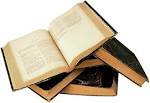

In [0]:
display_jpeg(Image('image_data/book/0.jpg'))

In [0]:
word = 'ボール'
images_dir = 'image_data/ball/'

In [0]:
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

url = "https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20"
pages = [1,20,40,60,80,100]

numb = 0

for p in pages:
    r = requests.get(url%(word,p))
    soup = BeautifulSoup(r.text,'lxml')
    imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
    for img in imgs:
        print('fetched ' + str(img['src']))
        r = requests.get(img['src'])
        with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
            file.write(r.content)
        numb += 1

fetched https://msp.c.yimg.jp/yjimage?q=iCxJjoAXyLEW3_GZVhx2NSDQQc0YwRNYXA_atm0vdPT6oP4sXe7SbVYLxELuOrCSEoeLGUYbe6wQ_wPuY6gs5YwP7a5vqH5svImWnf22RfriCxGXV2xOhLEKChZOkM0T3HDBo2BP6omfp.a8Q2eRQgoppdxb&sig=13gk0s2j7&x=149&y=149
fetched https://msp.c.yimg.jp/yjimage?q=4uMkaAwXyLFqdkE1yrquJDdNHnzspD8s4kpZV3D9HwkanYC.71TA0fPB8PwAiOOxQOdtlQqEyy3X1GIyDMzG8BcnA1cVu86o9LbdoA6xEDmDPU6Cq1NaV7ZZELsznsAGpkvXMRHlS.sr1KVq5PNYuL.d_xPSDpQ-&sig=13i56if0s&x=149&y=149
fetched https://msp.c.yimg.jp/yjimage?q=AmTTFrwXyLGC0jEtRG83LS4e28sE9iUKjkjXPURnpABjWtxWfReBp73w6YxTFt_PJy0de1C0LVlacO9T2r63wndgJOC6TWGfnEFOHB73A6gpvuE8nbeI7Dx_66TFQgct14iP3fGJB0UwL6wQ28rNPNdPYqr0&sig=13gdgg64r&x=150&y=150
fetched https://msp.c.yimg.jp/yjimage?q=KcesMiQXyLFJXMIoCnfFte5GwG0O1Hw7fCwA53Ky0R2JyDNSMzsCuWgKf85OoM0U3ArO61ZmbhUVd4nqxlvsJq6NvrY49Sr8bynMarvR.0211gS5iZsToyuoZsefyc05gqJPpszqTxByd231twyLVA2ePmjZ&sig=13g0r3l4i&x=150&y=150
fetched https://msp.c.yimg.jp/yjimage?q=ATNqsXsXyLFT4I4GvkVVPA5YVN6z0r1FCNTPJob5WTNPXzCFGcQAOp5rrYCll6gj

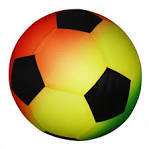

In [0]:
display_jpeg(Image('image_data/ball/0.jpg'))

それ以外を認識するものを作る

In [0]:
# 検索ワード
word = 'ペットボトル', 'いす', 'カメラ', '顔'
# 保存ディレクトリ
images_dir = 'image_data/other/'

In [0]:
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

url = "https://search.nifty.com/imagesearch/search?select=1&chartype=&q=%s&xargs=2&img.fmt=all&img.imtype=color&img.filteradult=no&img.type=all&img.dimensions=large&start=%s&num=20"
pages = [1,20]

numb = 0

for w in range(len(word)):
    for p in pages:
        r = requests.get(url%(word,p))
        soup = BeautifulSoup(r.text,'lxml')
        imgs = soup.find_all('img',src=re.compile('^https://msp.c.yimg.jp/yjimage'))
        for img in imgs:
            print('fetched ' + str(img['src']))
            r = requests.get(img['src'])
            with open(images_dir+str(numb)+str('.jpg'),'wb') as file:
                file.write(r.content)
            numb += 1

In [0]:
!ls image_data/other

0.jpg	 149.jpg  198.jpg  246.jpg  295.jpg  343.jpg  392.jpg  440.jpg	57.jpg
100.jpg  14.jpg   199.jpg  247.jpg  296.jpg  344.jpg  393.jpg  441.jpg	58.jpg
101.jpg  150.jpg  19.jpg   248.jpg  297.jpg  345.jpg  394.jpg  442.jpg	59.jpg
102.jpg  151.jpg  1.jpg    249.jpg  298.jpg  346.jpg  395.jpg  443.jpg	5.jpg
103.jpg  152.jpg  200.jpg  24.jpg   299.jpg  347.jpg  396.jpg  444.jpg	60.jpg
104.jpg  153.jpg  201.jpg  250.jpg  29.jpg   348.jpg  397.jpg  445.jpg	61.jpg
105.jpg  154.jpg  202.jpg  251.jpg  2.jpg    349.jpg  398.jpg  446.jpg	62.jpg
106.jpg  155.jpg  203.jpg  252.jpg  300.jpg  34.jpg   399.jpg  447.jpg	63.jpg
107.jpg  156.jpg  204.jpg  253.jpg  301.jpg  350.jpg  39.jpg   448.jpg	64.jpg
108.jpg  157.jpg  205.jpg  254.jpg  302.jpg  351.jpg  3.jpg    449.jpg	65.jpg
109.jpg  158.jpg  206.jpg  255.jpg  303.jpg  352.jpg  400.jpg  44.jpg	66.jpg
10.jpg	 159.jpg  207.jpg  256.jpg  304.jpg  353.jpg  401.jpg  450.jpg	67.jpg
110.jpg  15.jpg   208.jpg  257.jpg  305.jpg  354.jpg  402.jpg  451.jp

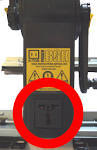

In [0]:
display_jpeg(Image('image_data/other/50.jpg'))

ラベルの作成(写真に何の写真なのかの意味付け)

In [0]:
import sys
import subprocess

In [0]:
# データの保存場所
backup_dir = './model'

In [0]:
# ラベルデータの作成
def cmd(cmd):
    # コマンドの実行(プロセス間通信入出力それぞれのファイルディスクリプタ)
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    p.wait()
    # デッドロック回避の時間制限
    stdout, stderr = p.communicate()
    # コマンドの出力結果を返す
    return stdout.rstrip()

# コマンドの出力結果(image_dataの中身を取得[この場合はスクレイピング結果を入れたディレクトリ名])
dirs = cmd("ls "+"./image_data")

# dirsの文字列を改行文字区切りで分割
labels = dirs.splitlines()

# データの保存場所が既にある場合、データの保存場所を削除
if os.path.exists(backup_dir):
   cmd("rm  -rf "+backup_dir)

# データの保存場所の作成
os.makedirs(backup_dir)
# labels.txt(ラベル名を書き込むためのファイル)を作成
labelsTxt_backup = open(backup_dir + '/labels.txt','w')

# ラベルの数
classNo=0

# ラベル名の書き込み
for label in labels:
   labelsTxt_backup.write(label.decode('utf-8')+"\n")
   classNo += 1
# ラベルの数の格納
NUM_CLASSES = classNo
# ラベルの数の確認
print("class number=" + str(NUM_CLASSES))
# 終わったので閉じる
labelsTxt_backup.close()

class number=5


ラベルの確認

In [0]:
!cat ./model/labels.txt

ball
book
other
pen
watch


In [0]:
!pip install tensorflow==1.8.0
!pip install keras==2.1.6

    100% |████████████████████████████████| 49.1MB 1.0MB/s 
    100% |████████████████████████████████| 3.1MB 12.2MB/s 
    100% |████████████████████████████████| 890kB 17.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.8.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorboard 1.12.2
    Uninstalling tensorboard-1.12.2:
      Successfully uninstalled tensorboard-1.12.2
  Found existing installation: tensorflow 1.13.0rc0
    Uninstalling tensorflow-1.13.0rc0:
      Successfully uninstalled tensorflow-1.13.0rc0


    100% |████████████████████████████████| 348kB 24.5MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [0]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [0]:
# ラベルファイルの読み込み
labels = []

# labels.txtからラベルをlabelsに書き込む
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
# 結果の確認
print(labels)

['ball', 'book', 'other', 'pen', 'watch']


In [0]:
# 教師データ(スクレイピングした画像データ)とラベル情報を読み込んで、行列に変換
# 画像情報
X = []
# ラベル
Y = []

label_num = 0
for label in labels:
    print(label)
    for picture in list_pictures('./image_data/' + label):
        img = img_to_array(load_img(picture, target_size=(64,64)))
        X.append(img)
        Y.append(label_num)
       
    label_num += 1

ball
book
other
pen
watch


In [0]:
# numpy形式の行列に変換
X = np.asarray(X)
Y = np.asarray(Y)

# 画素値を0から1の範囲に変換(正規化)
X = X.astype('float32')
X = X / 255.0

# クラスの形式を変換up_utils.to_categoricalでラベルのデータ変換
# Kerasがラベルを数値ではなく、0or1を要素に持つベクトルで扱う（One-Hot表現）
Y = np_utils.to_categorical(Y, NUM_CLASSES)

# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [0]:
# 学習率
LEARNING_RATE = 0.001
# バッチサイズ
BATCH_SIZE = 5
# エポック（世代数）
EPOCHS = 100

In [0]:
# ニューラルネットワークを定義
# MNISTのモデルでお試し
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', 
                input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=LEARNING_RATE)

model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

モデルの概要の確認

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

In [0]:
# 学習モデルと重みデータをGoogle Colaboratory上に保存
model_json_str = model.to_json()
with open(backup_dir + '/mnist_deep_model.json', 'w') as f:
   f.write(model_json_str)

# 重みデータのバックアップ
cb_cp = keras.callbacks.ModelCheckpoint(backup_dir + '/weights.{epoch:02d}.hdf5', verbose=1, save_weights_only=True)
# TensorBoard用のデータのバックアップ
cb_tf = keras.callbacks.TensorBoard(log_dir=backup_dir + '/tensorBoard', histogram_freq=0)

# 開始時間
start = time.time()
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                  validation_data = (X_test, y_test), verbose = 1,  callbacks=[cb_cp, cb_tf])
# 学習時間の計算
elapsed_time = time.time() - start
# 学習時間の表示
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

Train on 643 samples, validate on 317 samples
Epoch 1/100
643/643 [==============================] - 33s 51ms/step - loss: 1.4438 - acc: 0.4930 - val_loss: 1.4234 - val_acc: 0.4858

Epoch 00001: saving model to ./model/weights.01.hdf5
Epoch 2/100
643/643 [==============================] - 33s 51ms/step - loss: 1.3768 - acc: 0.5070 - val_loss: 1.3344 - val_acc: 0.4858

Epoch 00002: saving model to ./model/weights.02.hdf5
Epoch 3/100
643/643 [==============================] - 33s 51ms/step - loss: 1.3137 - acc: 0.5179 - val_loss: 1.3196 - val_acc: 0.5584

Epoch 00003: saving model to ./model/weights.03.hdf5
Epoch 4/100
643/643 [==============================] - 32s 50ms/step - loss: 1.2225 - acc: 0.5319 - val_loss: 1.2478 - val_acc: 0.5552

Epoch 00004: saving model to ./model/weights.04.hdf5
Epoch 5/100
643/643 [==============================] - 32s 50ms/step - loss: 1.1262 - acc: 0.5661 - val_loss: 1.1728 - val_acc: 0.6183

Epoch 00005: saving model to ./model/weights.05.hdf5
Epoch 6/1

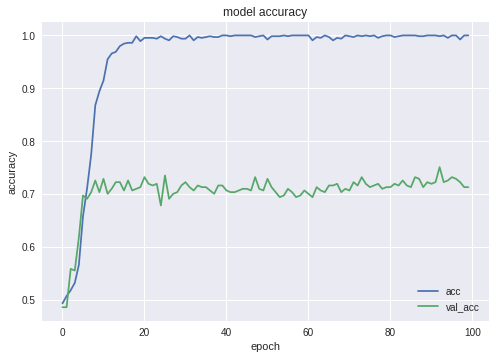

In [0]:
# 学習結果の表示
# 精度の確認
# 訓練データ
plt.plot(history.history['acc'])
# テストデータ
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

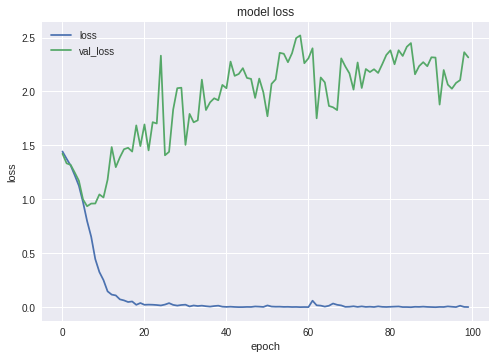

In [0]:
# 損失の表示(低いほどよい)
# 訓練データ
plt.plot(history.history['loss'])
# テストデータ
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
# 作ったモデルで判別
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import model_from_json

In [0]:
# ラベルを読み込む
labels = []
with open(backup_dir + '/labels.txt','r') as f:
   for line in f:
       labels.append(line.rstrip())
print(labels)

['ball', 'book', 'other', 'pen', 'watch']


In [0]:
# モデルを読み込む
model_pred = model_from_json(open(backup_dir + '/mnist_deep_model.json').read())

# 学習結果を読み込む
model_pred.load_weights(backup_dir + '/weights.99.hdf5')

model_pred.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

In [0]:
# 画像のアップロード
from google.colab import files
uploaded = files.upload()

Saving watch.jpg to watch.jpg


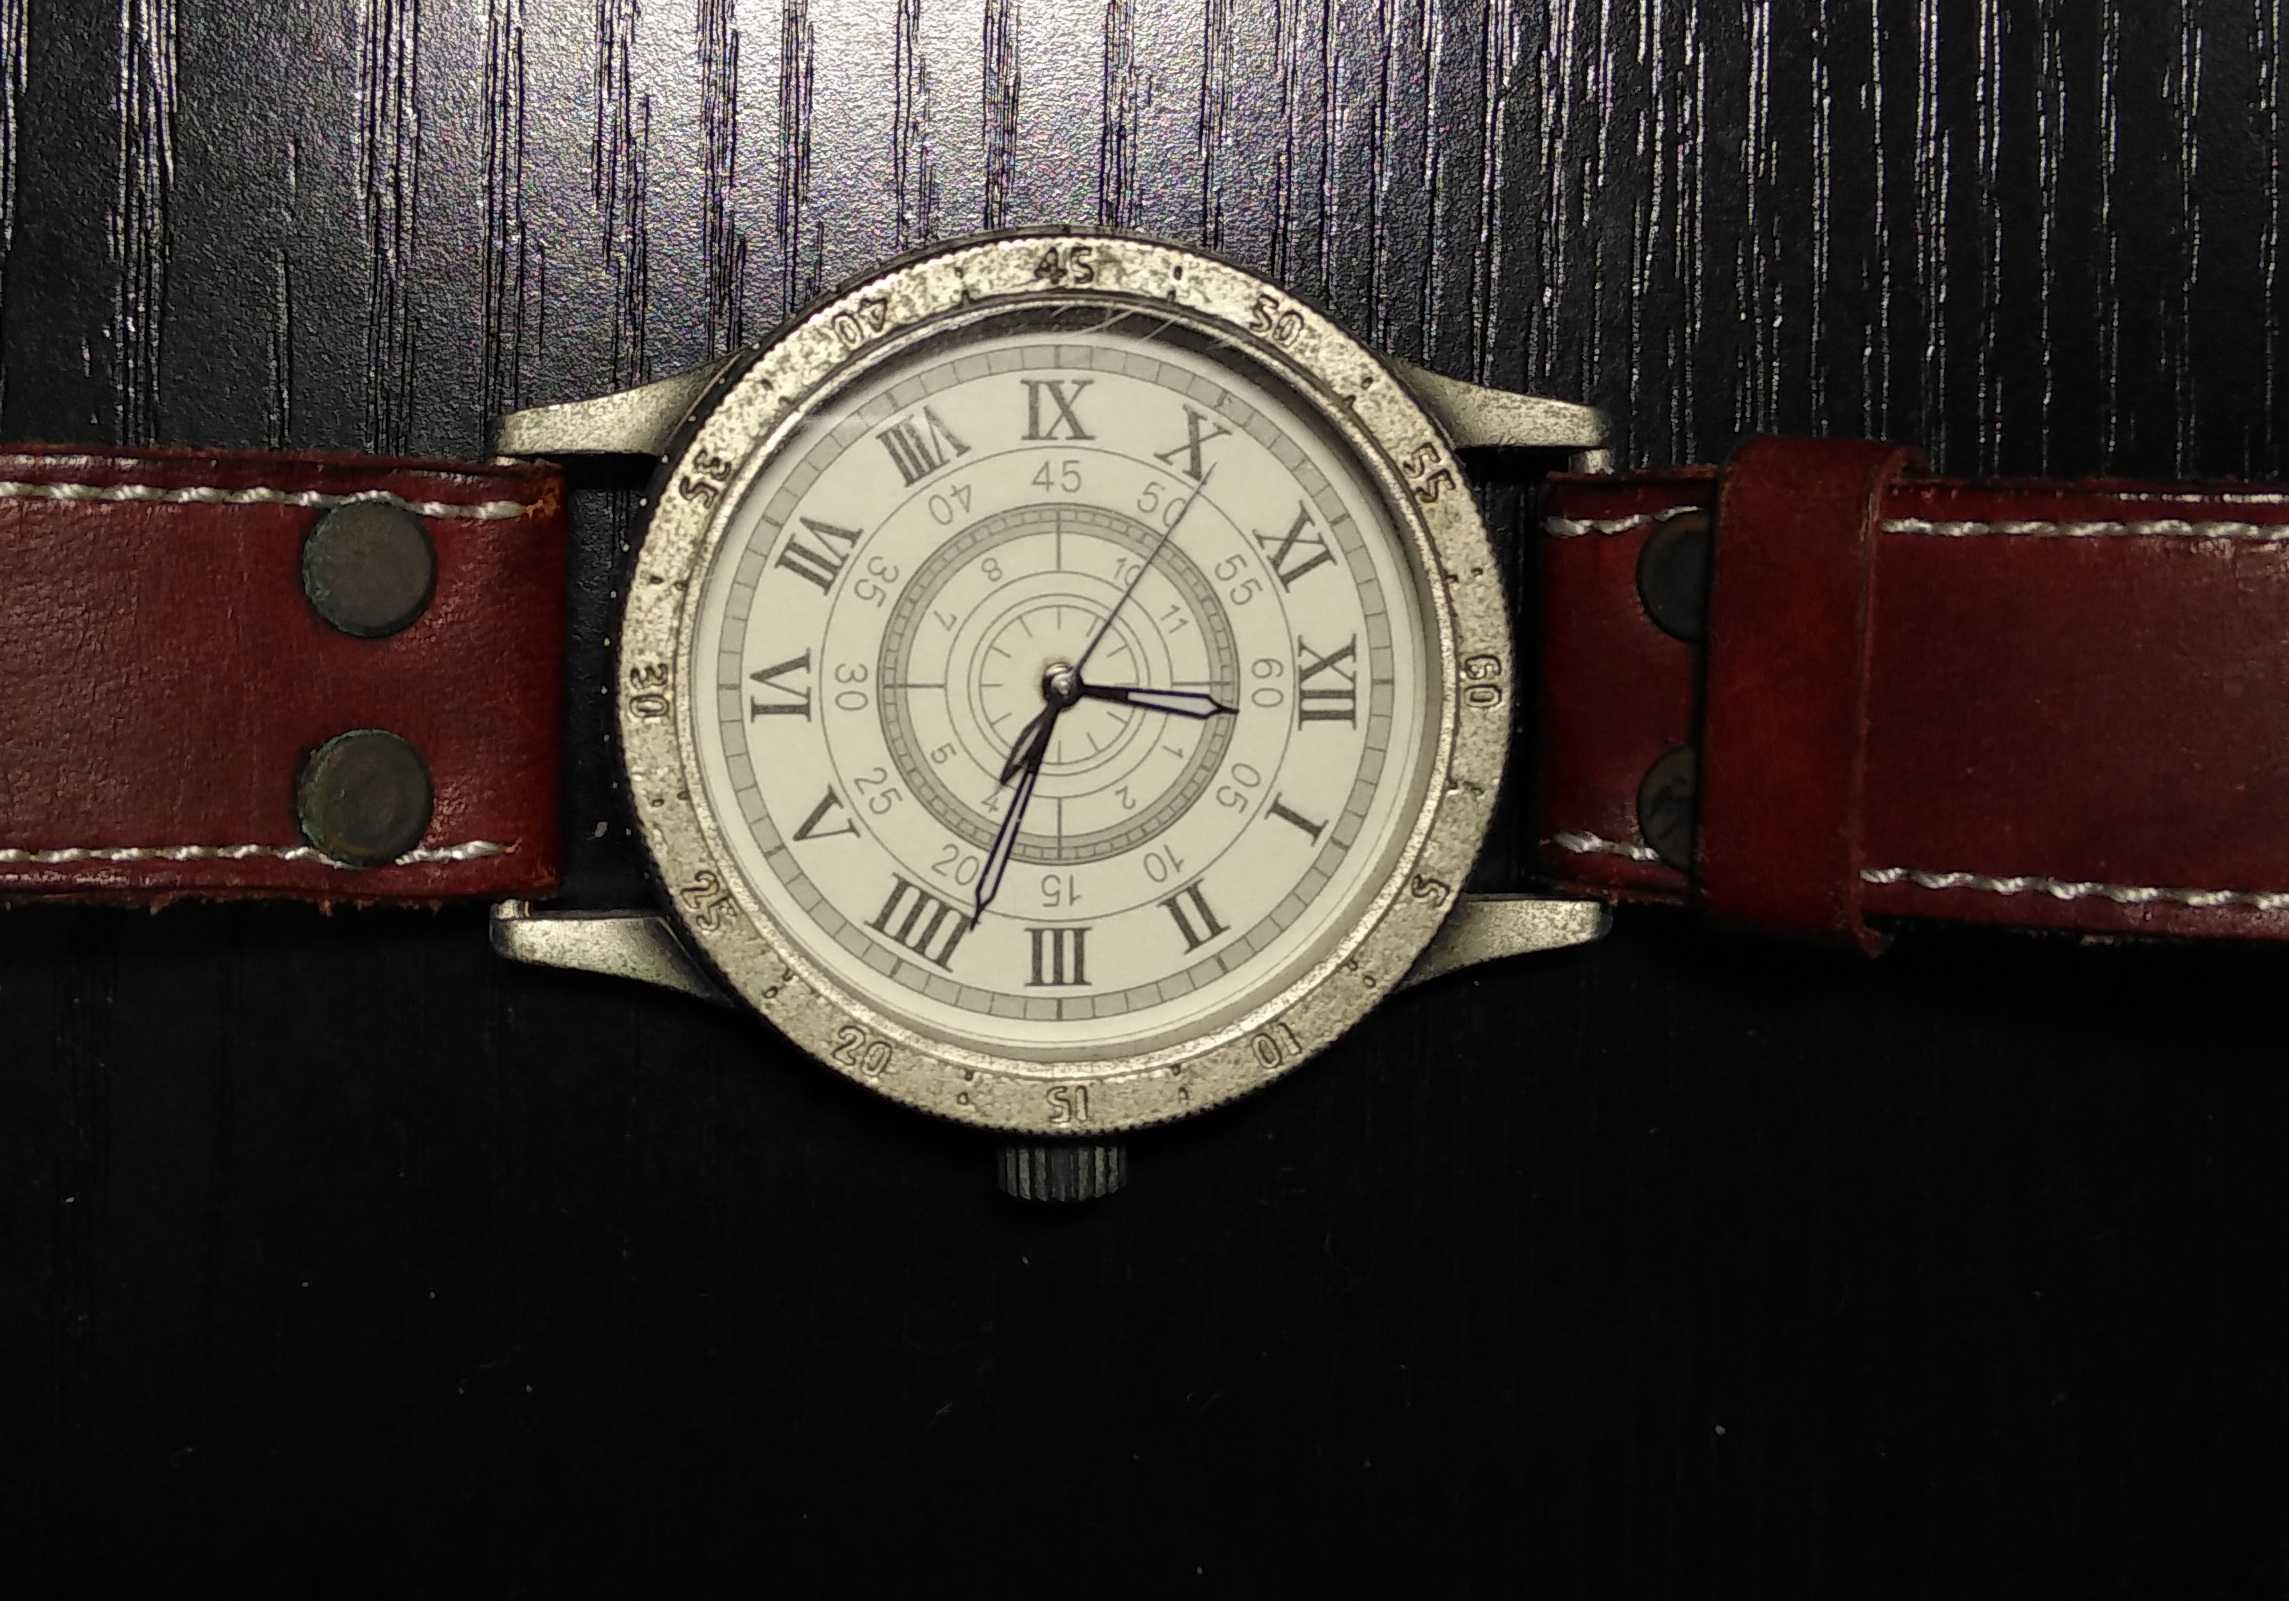

In [0]:
# アップロードした画像の表示確認
from IPython.display import Image,display_jpeg
# 前のセルで取得したuploadした画像を表示
display_jpeg(Image('watch.jpg'))

In [0]:
# 画像のフォーマット変換
X = []
img_path = './watch.jpg'
img = img_to_array(load_img(img_path, target_size=(64,64)))
X.append(img)
X = np.asarray(X)
print(X.shape)

(1, 64, 64, 3)


In [0]:
# 判別　学習の時とやってること一緒
preds = model_pred.predict(X)

pred_label = ""

label_num = 0
for i in preds[0]:
   if i == 1.0:
       pred_label = labels[label_num]
   label_num += 1

print(pred_label)

book


In [0]:
# 性能を向上させる(つもり)
# GPUつかえばいいのかな？
import tensorflow as tf
tf.test.gpu_device_name()    # 出力結果が'/device:GPU:0'　と表示されたらGPUが使える

''

マシンのスペックを確認。まずはCPU

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power ma

GPUのスペック

In [0]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla K80
IRQ:   		 33
GPU UUID: 	 GPU-b04fadb2-cb7f-f534-146f-252af2f1cccb
Video BIOS: 	 80.21.25.00.01
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


In [0]:
# GPUで学習
# MNISTより少し深めにネットワークを組む
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', 
                input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# モデルの概要の確認
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)        18496     
__________

In [0]:
# 学習スタート
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                  validation_data = (X_test, y_test), verbose = 1)

Train on 643 samples, validate on 317 samples
Epoch 1/100
643/643 [==============================] - 31s 47ms/step - loss: 1.4120 - acc: 0.5008 - val_loss: 1.3738 - val_acc: 0.4858
Epoch 2/100
643/643 [==============================] - 30s 46ms/step - loss: 1.3292 - acc: 0.5054 - val_loss: 1.3298 - val_acc: 0.4858
Epoch 3/100
643/643 [==============================] - 29s 46ms/step - loss: 1.2574 - acc: 0.5241 - val_loss: 1.2547 - val_acc: 0.5079
Epoch 4/100
643/643 [==============================] - 30s 46ms/step - loss: 1.1195 - acc: 0.5708 - val_loss: 1.2223 - val_acc: 0.5394
Epoch 5/100
643/643 [==============================] - 30s 46ms/step - loss: 1.0123 - acc: 0.6190 - val_loss: 1.1879 - val_acc: 0.6088
Epoch 6/100
643/643 [==============================] - 30s 46ms/step - loss: 0.8659 - acc: 0.6765 - val_loss: 1.2044 - val_acc: 0.6372
Epoch 7/100
643/643 [==============================] - 30s 46ms/step - loss: 0.6505 - acc: 0.7636 - val_loss: 1.1550 - val_acc: 0.6372
Epoch 8/1

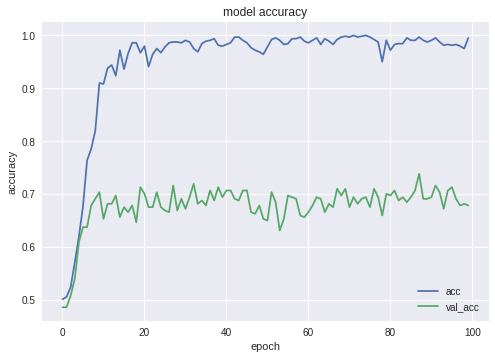

In [0]:
# 精度の確認
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

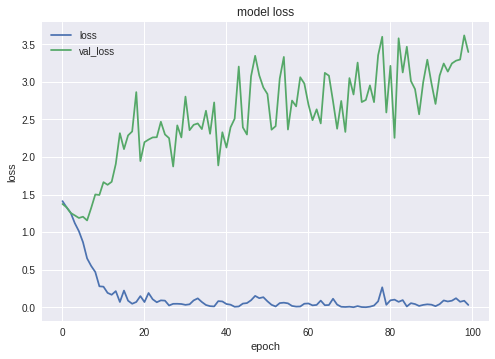

In [0]:
# 損失の確認
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

# 使う画像を増やす

In [0]:
import cv2
import numpy as np
import sys
import os

In [0]:
# ノイズをかけて画像の水まし
# N増し用の画像処理の関数
# ヒストグラム均一化
def equalizeHistRGB(src):
   RGB = cv2.split(src)
   Blue   = RGB[0]
   Green = RGB[1]
   Red    = RGB[2]
   for i in range(3):
       cv2.equalizeHist(RGB[i])
   img_hist = cv2.merge([RGB[0],RGB[1], RGB[2]])
   return img_hist

# ガウシアンノイズ
def addGaussianNoise(src):
   row,col,ch= src.shape
   mean = 0
   var = 0.1
   sigma = 15
   gauss = np.random.normal(mean,sigma,(row,col,ch))
   gauss = gauss.reshape(row,col,ch)
   noisy = src + gauss
   return noisy

# salt&pepperノイズ
def addSaltPepperNoise(src):
   row,col,ch = src.shape
   s_vs_p = 0.5
   amount = 0.004
   out = src.copy()
   # Salt mode
   num_salt = np.ceil(amount * src.size * s_vs_p)
   coords = [np.random.randint(0, i-1 , int(num_salt))
                for i in src.shape]
   out[coords[:-1]] = (255,255,255)
   # Pepper mode
   num_pepper = np.ceil(amount* src.size * (1. - s_vs_p))
   coords = [np.random.randint(0, i-1 , int(num_pepper))
            for i in src.shape]
   out[coords[:-1]] = (0,0,0)
   return out

In [0]:
# 画像ファイルパスのリストを生成
labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

image_file_names = []

for label in labels:
  image_dirs = cmd('ls '+'./image_data/' + label).decode('utf-8')
  image_files = image_dirs.splitlines()
  for image_file in image_files:
    image_file_names.append('./image_data/' + label + '/' + image_file)
    
print(image_file_names)

['ball', 'book', 'other', 'pen', 'watch']
['./image_data/ball/0.jpg', './image_data/ball/100.jpg', './image_data/ball/101.jpg', './image_data/ball/102.jpg', './image_data/ball/103.jpg', './image_data/ball/104.jpg', './image_data/ball/105.jpg', './image_data/ball/106.jpg', './image_data/ball/107.jpg', './image_data/ball/108.jpg', './image_data/ball/109.jpg', './image_data/ball/10.jpg', './image_data/ball/110.jpg', './image_data/ball/111.jpg', './image_data/ball/112.jpg', './image_data/ball/113.jpg', './image_data/ball/114.jpg', './image_data/ball/115.jpg', './image_data/ball/116.jpg', './image_data/ball/117.jpg', './image_data/ball/118.jpg', './image_data/ball/119.jpg', './image_data/ball/11.jpg', './image_data/ball/12.jpg', './image_data/ball/13.jpg', './image_data/ball/14.jpg', './image_data/ball/15.jpg', './image_data/ball/16.jpg', './image_data/ball/17.jpg', './image_data/ball/18.jpg', './image_data/ball/19.jpg', './image_data/ball/1.jpg', './image_data/ball/20.jpg', './image_data/b

In [0]:
# 画像のN増し
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table
gamma1 = 0.75
gamma2 = 1.5

LUT_HC = np.arange(256, dtype = 'uint8' )
LUT_LC = np.arange(256, dtype = 'uint8' )
LUT_G1 = np.arange(256, dtype = 'uint8' )
LUT_G2 = np.arange(256, dtype = 'uint8' )

LUTs = []

# 平滑化用
average_square = (10,10)

# ハイコントラストLUT作成
for i in range(0, min_table):
  LUT_HC[i] = 0

for i in range(min_table, max_table):
  LUT_HC[i] = 255 * (i - min_table) / diff_table

for i in range(max_table, 255):
  LUT_HC[i] = 255

# その他LUT作成
for i in range(256):
  LUT_LC[i] = min_table + i * (diff_table) / 255
  LUT_G1[i] = 255 * pow(float(i) / 255, 1.0 / gamma1)
  LUT_G2[i] = 255 * pow(float(i) / 255, 1.0 / gamma2)

LUTs.append(LUT_HC)
LUTs.append(LUT_LC)
LUTs.append(LUT_G1)
LUTs.append(LUT_G2)

for image_file in image_file_names:
  # 画像の読み込み
  img_src = cv2.imread(image_file, 1)
  trans_img = []
  trans_img.append(img_src)

  # LUT変換
  for i, LUT in enumerate(LUTs):
    trans_img.append(cv2.LUT(img_src, LUT))

  # 平滑化
  trans_img.append(cv2.blur(img_src, average_square))

  # ヒストグラム均一化
  trans_img.append(equalizeHistRGB(img_src))

  # ノイズ付加
  trans_img.append(addGaussianNoise(img_src))
  trans_img.append(addSaltPepperNoise(img_src))

  # 反転
  flip_img = []
  for img in trans_img:
     flip_img.append(cv2.flip(img, 1))
  trans_img.extend(flip_img)

  dir_name =  os.path.splitext(os.path.dirname(image_file))[0]
  base_name =  os.path.splitext(os.path.basename(image_file))[0]
  img_src.astype(np.float64)
  
  for i, img in enumerate(trans_img):
    if i > 0:
      cv2.imwrite(dir_name + '/trans_' + base_name + '_' + str(i-1) + '.jpg' ,img)

N増しされたデータの確認

In [0]:
!ls ./image_data/ball

0.jpg		  trans_13_11.jpg  trans_4_1.jpg    trans_71_11.jpg
100.jpg		  trans_13_12.jpg  trans_42_0.jpg   trans_71_12.jpg
101.jpg		  trans_13_13.jpg  trans_42_10.jpg  trans_71_13.jpg
102.jpg		  trans_13_14.jpg  trans_42_11.jpg  trans_71_14.jpg
103.jpg		  trans_13_15.jpg  trans_42_12.jpg  trans_71_15.jpg
104.jpg		  trans_13_16.jpg  trans_42_13.jpg  trans_71_16.jpg
105.jpg		  trans_13_1.jpg   trans_42_14.jpg  trans_7_11.jpg
106.jpg		  trans_13_2.jpg   trans_42_15.jpg  trans_71_1.jpg
107.jpg		  trans_13_3.jpg   trans_42_16.jpg  trans_7_12.jpg
108.jpg		  trans_13_4.jpg   trans_42_1.jpg   trans_71_2.jpg
109.jpg		  trans_13_5.jpg   trans_42_2.jpg   trans_7_13.jpg
10.jpg		  trans_13_6.jpg   trans_42_3.jpg   trans_71_3.jpg
110.jpg		  trans_13_7.jpg   trans_42_4.jpg   trans_7_14.jpg
111.jpg		  trans_13_8.jpg   trans_42_5.jpg   trans_71_4.jpg
112.jpg		  trans_13_9.jpg   trans_42_6.jpg   trans_7_15.jpg
113.jpg		  trans_1_3.jpg    trans_42_7.jpg   trans_71_5.jpg
114.jpg		  trans_14_0.jpg   trans_42_

In [0]:
#再学習の時間
# モデルの保存
model_json_str = model.to_json()
with open(backup_dir + '/mnist_deep_model.json', 'w') as f:
  f.write(model_json_str)
# 重みデータのバックアップ
cb_cp = keras.callbacks.ModelCheckpoint(backup_dir + '/weights.{epoch:02d}.hdf5', verbose=1, save_weights_only=True)
# TensorBoard用のデータのバックアップ
cb_tf = keras.callbacks.TensorBoard(log_dir=backup_dir + '/tensorBoard', histogram_freq=0)
start = time.time()
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                 validation_data = (X_test, y_test), verbose = 1,  callbacks=[cb_cp, cb_tf])
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

Train on 643 samples, validate on 317 samples
Epoch 1/100
643/643 [==============================] - 30s 47ms/step - loss: 0.0228 - acc: 0.9938 - val_loss: 3.0583 - val_acc: 0.7035

Epoch 00001: saving model to ./model/weights.01.hdf5
Epoch 2/100
643/643 [==============================] - 30s 47ms/step - loss: 0.0019 - acc: 0.9984 - val_loss: 3.7086 - val_acc: 0.6877

Epoch 00002: saving model to ./model/weights.02.hdf5
Epoch 3/100
643/643 [==============================] - 30s 47ms/step - loss: 0.1014 - acc: 0.9844 - val_loss: 3.2888 - val_acc: 0.7003

Epoch 00003: saving model to ./model/weights.03.hdf5
Epoch 4/100
643/643 [==============================] - 30s 47ms/step - loss: 0.0600 - acc: 0.9891 - val_loss: 3.9221 - val_acc: 0.6688

Epoch 00004: saving model to ./model/weights.04.hdf5
Epoch 5/100
643/643 [==============================] - 30s 47ms/step - loss: 0.0947 - acc: 0.9876 - val_loss: 3.7901 - val_acc: 0.6751

Epoch 00005: saving model to ./model/weights.05.hdf5
Epoch 6/1

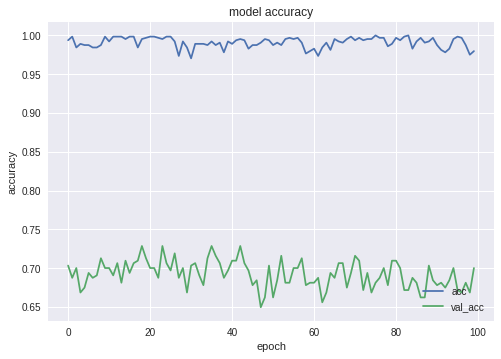

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

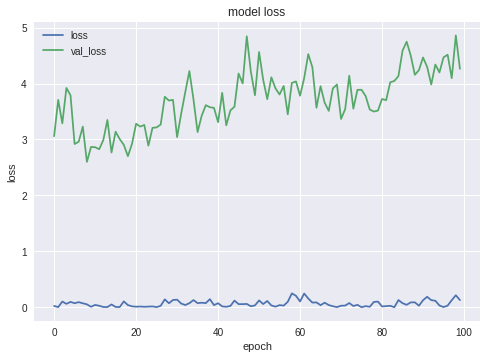

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

学習したモデルのダウンロード(Google Colaboratory上で生成したファイルは、再起動すると消えちまうんじゃあ)

model.tar.gzという圧縮ファイルの作成　中身：ラベルの情報が記載されたテキストファイル(labels.txt), 学習したニューラルネットのネットワーク形状のファイル(mnist_deep_model.json), 学習したニューラルネットのネットワーク形状のファイルとニューラルネットワークの重み情報(weights.99.hdf5)

In [0]:
!tar cvzf model.tar.gz ./model/weights.99.hdf5 ./model/labels.txt ./model/mnist_deep_model.json

./model/weights.99.hdf5
./model/labels.txt
./model/mnist_deep_model.json


ファイルのダウンロード

In [0]:
from google.colab import files
files.download("model.tar.gz")

# 参考リンク
[Pythonで画像スクレイピングをしよう](https://qiita.com/neet-AI/items/98d4194872ee4f53e3b4)

[Keras / Tensorflowで始めるディープラーニング入門](https://qiita.com/yampy/items/706d44417c433e68db0d)

[kerasでCNN 自分で拾った画像でやってみる](https://qiita.com/haru1977/items/17833e508fe07c004119)

[【技術】kerasのnp_utils.to_categoricalについて](http://hatakazu.hatenablog.com/entry/2017/06/08/045953)

[Kerasによるデータ拡張](http://aidiary.hatenablog.com/entry/20161212/1481549365)

[KerasでCIFAR-10の一般物体認識](http://aidiary.hatenablog.com/entry/20161127/1480240182)


[ColaboratoryでKerasからTensorboard出力をする](https://qiita.com/Mco7777/items/2b76aba1bae35f2623ea)